In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os
import sklearn


import os
import PIL
import tensorflow as tf
import pandas as pd


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn import preprocessing
from keras.utils import to_categorical

In [61]:
from pathlib import Path

data_directory = Path('classzgory').resolve()

SIZE_IMAGE = 120

In [62]:
X, y = [], []
for dir in data_directory.iterdir():
    for file in dir.iterdir():
        img = cv2.imread(str(file))
        img = cv2.resize(img, (SIZE_IMAGE, SIZE_IMAGE))
        X.append(img)
        y.append(dir.name)

X = np.array(X)
y = np.array(y).reshape(-1, 1)
X.shape, y.shape

((345, 120, 120, 3), (345, 1))

In [63]:
labelencoder = preprocessing.LabelEncoder()
if y.shape[1] == 1:
    #y = labelencoder.fit(y) #dopasowywanie etykiet
    #y = labelencoder.transform(y) #przekształcamy etykiety do znormalizowanego kodowania
    y = labelencoder.fit_transform(y)
    y = to_categorical(y, num_classes=2)
print(y.shape)

#zamieniamy y 
y = y.astype(int)

(345, 2)


c:\Users\Przemek\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
from pathlib import Path

data_directory1 = Path('class').resolve()

SIZE_IMAGE = 120

In [65]:
X1, y1 = [], []
for dir in data_directory1.iterdir():
    for file in dir.iterdir():
        img1 = cv2.imread(str(file))
        img1 = cv2.resize(img, (SIZE_IMAGE, SIZE_IMAGE))
        X1.append(img1)
        y1.append(dir.name)

X1 = np.array(X1)
y1 = np.array(y1).reshape(-1, 1)
X1.shape, y1.shape

((1150, 120, 120, 3), (1150, 1))

In [66]:
labelencoder = preprocessing.LabelEncoder()
if y1.shape[1] == 1:
    #y = labelencoder.fit(y) #dopasowywanie etykiet
    #y = labelencoder.transform(y) #przekształcamy etykiety do znormalizowanego kodowania
    y1 = labelencoder.fit_transform(y1)
    y1 = to_categorical(y1, num_classes=2)
print(y1.shape)

#zamieniamy y 
y1 = y1.astype(int)

(1150, 2)


In [67]:
X_train1 = X1
X_test1 = X
y_train1 = y1
y_test1 = y

In [68]:
X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape

((1150, 120, 120, 3), (1150, 2), (345, 120, 120, 3), (345, 2))

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten, MaxPool2D
import pydot
import graphviz

In [70]:
nnetwork = Sequential([
    #Conv2D(filters=16,kernel_size=(3,3), activation='relu',padding='same', input_shape=(120,120,3)),
    #MaxPool2D(pool_size=(2,2)),
    #Conv2D(filters=32, kernel_size=(3,3),activation='relu',padding='same'),
    #MaxPool2D(pool_size=(2,2)),
    Flatten(input_shape=(120,120,3)),
    #Flatten(),
    Dense(units=128,activation='relu'),
    Dense(units=2,activation='softmax')
])

In [71]:
nnetwork.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    #loss = 'mean_squared_error'
    metrics = ['accuracy']
)

In [72]:
history = nnetwork.fit(X_train1, y_train1,
            epochs = 15,
            validation_data=(X_test1,y_test1),
            #callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)]
)

Epoch 1/15
36/36 [==============================] - 2s 44ms/step - loss: 462030.4062 - accuracy: 0.4913 - val_loss: 10.2301 - val_accuracy: 0.4609
Epoch 2/15
36/36 [==============================] - 1s 40ms/step - loss: 0.6931 - accuracy: 0.4983 - val_loss: 10.2292 - val_accuracy: 0.4609
Epoch 3/15
36/36 [==============================] - 1s 34ms/step - loss: 0.6932 - accuracy: 0.5070 - val_loss: 10.2286 - val_accuracy: 0.4609
Epoch 4/15
36/36 [==============================] - 1s 34ms/step - loss: 0.6932 - accuracy: 0.5070 - val_loss: 10.2279 - val_accuracy: 0.4609
Epoch 5/15
36/36 [==============================] - 1s 33ms/step - loss: 0.6931 - accuracy: 0.5070 - val_loss: 10.2277 - val_accuracy: 0.4609
Epoch 6/15
36/36 [==============================] - 1s 31ms/step - loss: 0.6931 - accuracy: 0.5070 - val_loss: 10.2272 - val_accuracy: 0.4609
Epoch 7/15
36/36 [==============================] - 1s 35ms/step - loss: 0.6931 - accuracy: 0.5070 - val_loss: 10.2271 - val_accuracy: 0.4609
E

In [73]:
label_values = ['hulajnoga', 'rower']

In [74]:
y_pred = np.argmax(nnetwork.predict(X_test1),axis=1)

11/11 [==============================] - 0s 8ms/step


In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

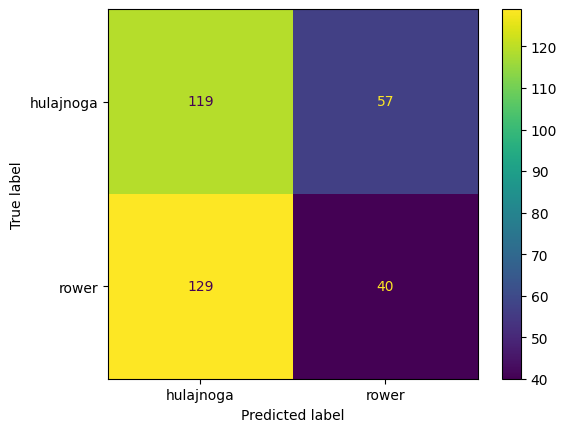

In [76]:
new_test1 = [label_values[i] for i in y_pred]
new_test2 = [label_values[i] for i in np.argmax(y_test1, axis = 1)]

cm = confusion_matrix(new_test2, new_test1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=label_values
                              
                              
                              )
disp.plot()